<a href="https://colab.research.google.com/github/modhudeb/Medi-Cost-Prediction-Supervised/blob/main/MediCostPred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preparing data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("insurance.csv")

In [3]:
df = data.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
cols = df.select_dtypes('object').columns
{col : list(df[col].unique()) for col in cols}

{'sex': ['female', 'male'],
 'smoker': ['yes', 'no'],
 'region': ['southwest', 'southeast', 'northwest', 'northeast']}

#Explortory Data anlysis

In [6]:
# Handling categorical data

cols = df.select_dtypes('object').columns
for col in cols :
  # nwCol = f"P_{col}"
  df[('P_'+ col)] = df[col].astype("category").cat.codes



In [7]:
# df.region.astype("category").cat.codes.value_counts()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801
P_sex,1338.0,0.505232,0.500160,0.0000,0.00000,1.000,1.000000,1.00000
P_smoker,1338.0,0.204783,0.403694,0.0000,0.00000,0.000,0.000000,1.00000
P_region,1338.0,1.515695,1.104885,0.0000,1.00000,2.000,2.000000,3.00000


In [8]:
# jehetu categorical data gula kono kame ashena, tai amra egula re Numeric banai nisi 
# ekhon categorical data gular ar kono kam nai, so
# load na baraiya delete dilei pari
df.drop(columns = list(df.select_dtypes("object").columns), inplace=True)
"""Hints:
  Female = 0, Male = 1
  somker : yes = 1, no = 0
  region: northeast = 0, northwest = 1, southeast = 2, southwest = 3
"""


'Hints:\n  Female = 0, Male = 1\n  somker : yes = 1, no = 0\n  region: northeast = 0, northwest = 1, southeast = 2, southwest = 3\n'

In [9]:
df

,age,bmi,children,charges,P_sex,P_smoker,P_region
0,19,27.900,0,16884.92400,0,1,3
1,18,33.770,1,1725.55230,1,0,2
2,28,33.000,3,4449.46200,1,0,2
3,33,22.705,0,21984.47061,1,0,1
4,32,28.880,0,3866.85520,1,0,1
...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1
1334,18,31.920,0,2205.98080,0,0,0
1335,18,36.850,0,1629.83350,0,0,2
1336,21,25.800,0,2007.94500,0,0,3


In [10]:
childs = df["children"].value_counts()
print(childs)
# sns.barplot(x = childs.index, y = childs.values)

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


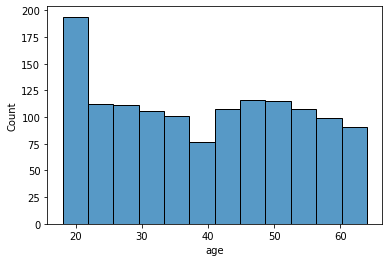

In [11]:
sns.histplot(data = df, x = 'age')

In [12]:
# sns.pairplot(data = df, palette = 'Set3')

In [13]:
# Data is now prepared, Lets save it as csv file
df.to_csv('prepared_Insurance.csv')